# week 2
## Feedforword Neural Networks

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

In [5]:
# load and preprocess the iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target.reshape(-1, 1) # Labels reshaped for OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y) # One-hot encode labels

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # Standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
# define activation function and their derivatives
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2

        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate
        return np.mean(np.abs(error))

    def train(self, X, y):
        self.losses = []
        for epoch in range(self.epochs):
            output = self.forward(X)
            loss = self.backward(X, y, output)
            self.losses.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [10]:
# train the MLP model
mlp = MLP(input_size=4, hidden_size=5, output_size=3, learning_rate=0.1, epochs=1000)
mlp.train(X_train, y_train)

Epoch 0, Loss: 0.4546
Epoch 100, Loss: 0.0715
Epoch 200, Loss: 0.0479
Epoch 300, Loss: 0.0403
Epoch 400, Loss: 0.0363
Epoch 500, Loss: 0.0338
Epoch 600, Loss: 0.0321
Epoch 700, Loss: 0.0309
Epoch 800, Loss: 0.0299
Epoch 900, Loss: 0.0292


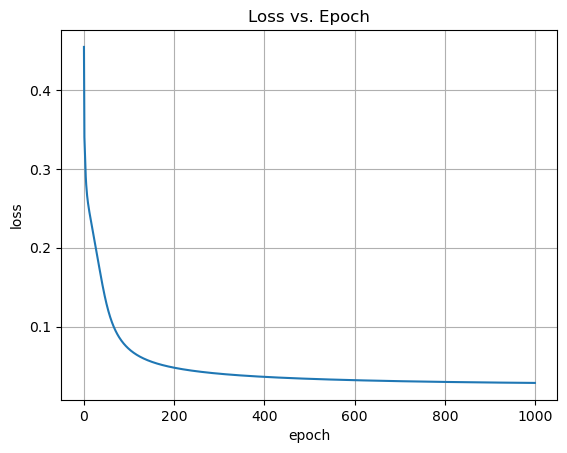

In [11]:
# plot the loss
plt.plot(mlp.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. Epoch')
plt.grid()
plt.show()


In [12]:
# test the MLP model
predictions = mlp.predict(X_test)
y_test_label = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_label)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 1.00
